# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [146]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

import scipy as sp
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

%matplotlib inline

Прочитаем исходные данные:

In [109]:
data = pd.read_csv('_unconv/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

In [45]:
# Ваш код здесь
#######################################################
data.describe()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,14.991150,4.330750,2.968850,48.161950,0.990450,1.964300,4311.219852
std,57.879185,2.971176,1.731014,0.566885,14.129455,0.481588,0.300827,992.038414
min,1.000000,6.550000,1.130000,1.280000,10.940000,-0.190000,0.930000,2107.139414
25%,50.750000,12.912500,3.122500,2.547500,37.755000,0.617500,1.770000,3618.064513
50%,100.500000,15.070000,4.035000,2.955000,49.510000,1.030000,1.960000,4284.687348
75%,150.250000,17.402500,5.287500,3.345000,58.262500,1.350000,2.142500,5086.089761
max,200.000000,23.550000,9.870000,4.630000,84.330000,2.180000,2.870000,6662.622385


In [49]:
print("Описание столбцов")
print(data.info()) 
print("-----------------------------------------------------------------------------------------")
print("Проверка на null значений")
print(data.isnull().sum()) 
print("-----------------------------------------------------------------------------------------")
print("Статистические данные")
# Форматируем результат describe() до двух знаков после запятой
formatted = data.describe().apply(lambda x: x.apply('{:.2f}'.format))
print(formatted)
print("-----------------------------------------------------------------------------------------")

Описание столбцов
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Well     200 non-null    int64  
 1   Por      200 non-null    float64
 2   Perm     200 non-null    float64
 3   AI       200 non-null    float64
 4   Brittle  200 non-null    float64
 5   TOC      200 non-null    float64
 6   VR       200 non-null    float64
 7   Prod     200 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.6 KB
None
-----------------------------------------------------------------------------------------
Проверка на null значений
Well       0
Por        0
Perm       0
AI         0
Brittle    0
TOC        0
VR         0
Prod       0
dtype: int64
-----------------------------------------------------------------------------------------
Статистические данные
         Well     Por    Perm      AI Brittle     TOC      VR     Prod
count  200.00  200.00  200

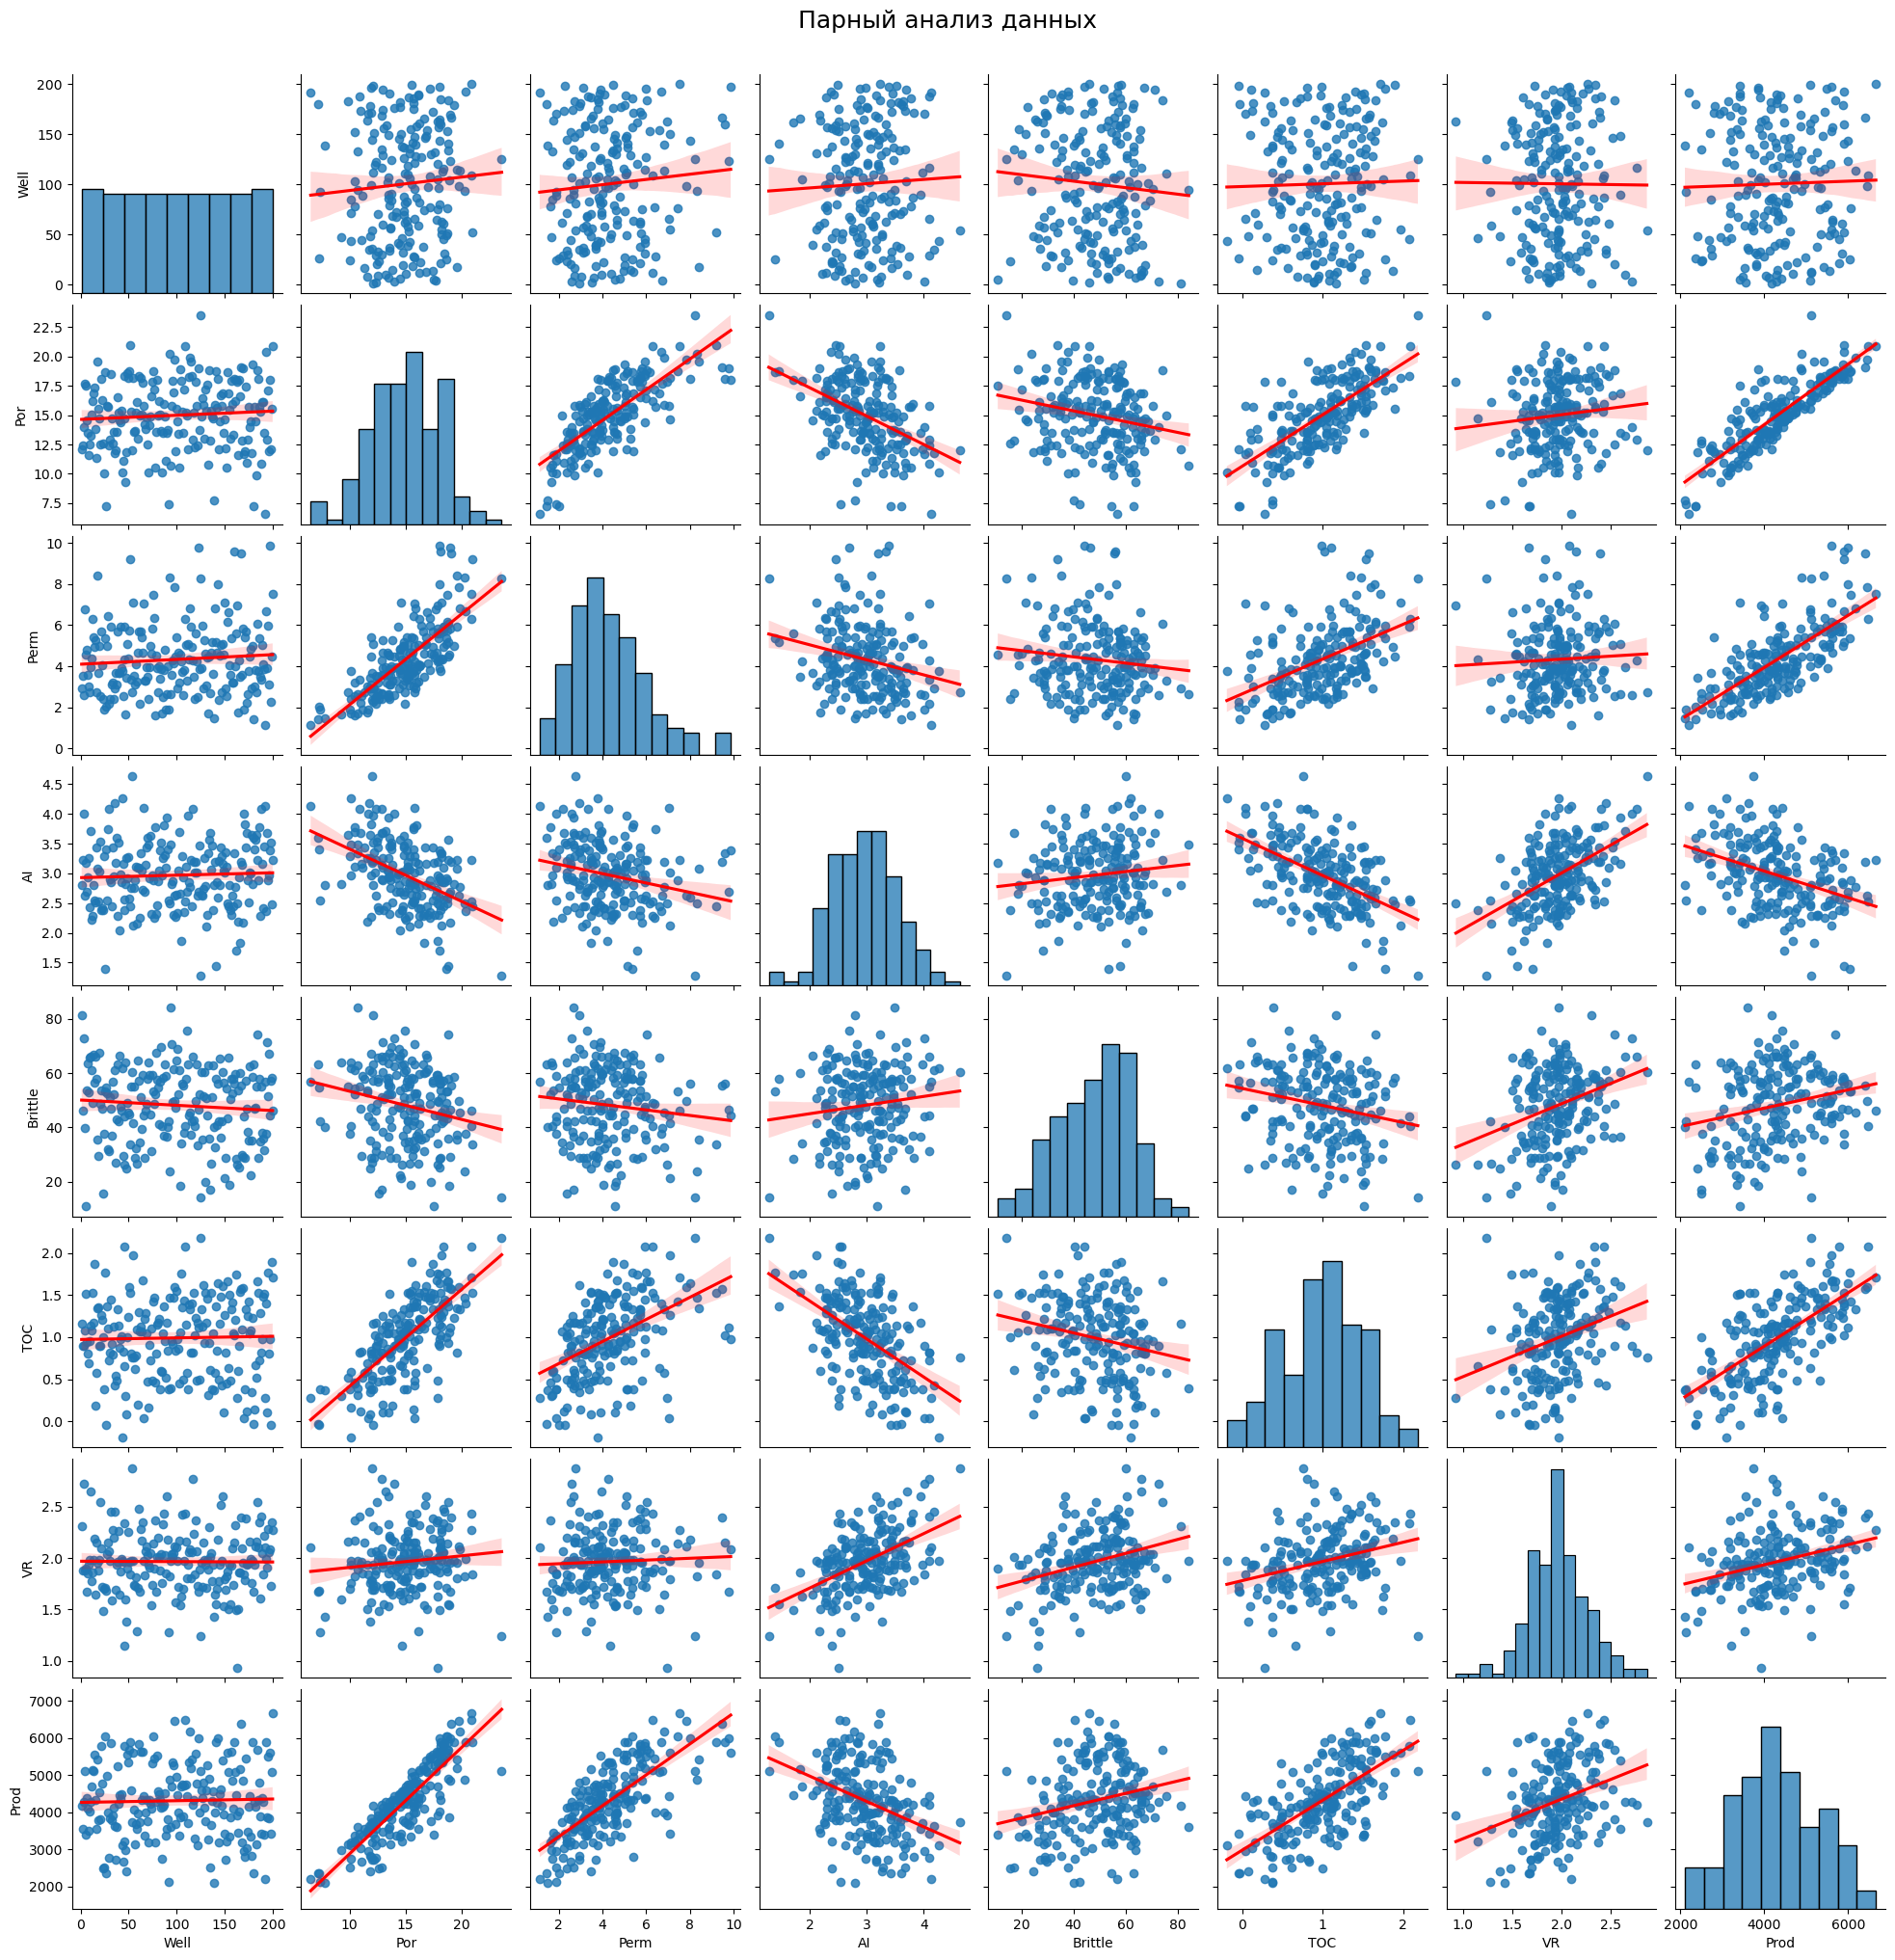

In [21]:
sns.pairplot(data, kind='reg', markers='o', plot_kws={'line_kws': {'color': 'red'}})

# Устанавливаем русский шрифт и название графика
plt.rcParams['font.family'] = 'DejaVu Sans'
# plt.title("Парный анализ данных")
plt.suptitle("Парный анализ данных", y=1.02, fontsize=18)

# Сохраним график 
plt.savefig('charts/pairplot.png', dpi=300)

plt.show()

Вывод 
---

На основе анализа графиков можно сделать следующие выводы:

* Por и Perm: Пористость (Por) и проницаемость (Perm) имеют линейную зависимость. Это указывает на то, что увеличение пористости приводит к увеличению проницаемости, и наоборот.

* Por и Prod: Пористость (Por) также линейно связана с добычей газа (Prod). Это означает, что с увеличением пористости увеличивается и добыча газа.

Таким образом можем сделать выводом о том, что пористость и проницаемость скважины оказывают значительное влияние на добычу газа.

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [110]:
# Ваш код здесь
######################################################

correlation_matrix = data.corr()
correlation_matrix

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
Well,1.000000,0.068927,0.077928,0.041483,-0.079252,0.022624,-0.007279,0.026817
Por,0.068927,1.000000,0.760546,-0.461549,-0.218570,0.711831,0.111860,0.861910
Perm,0.077928,0.760546,1.000000,-0.239636,-0.124017,0.471746,0.051023,0.727426
AI,0.041483,-0.461549,-0.239636,1.000000,0.127599,-0.531864,0.499143,-0.390835
Brittle,-0.079252,-0.218570,-0.124017,0.127599,1.000000,-0.214282,0.317929,0.237155
TOC,0.022624,0.711831,0.471746,-0.531864,-0.214282,1.000000,0.299483,0.654445
VR,-0.007279,0.111860,0.051023,0.499143,0.317929,0.299483,1.000000,0.323182
Prod,0.026817,0.861910,0.727426,-0.390835,0.237155,0.654445,0.323182,1.000000


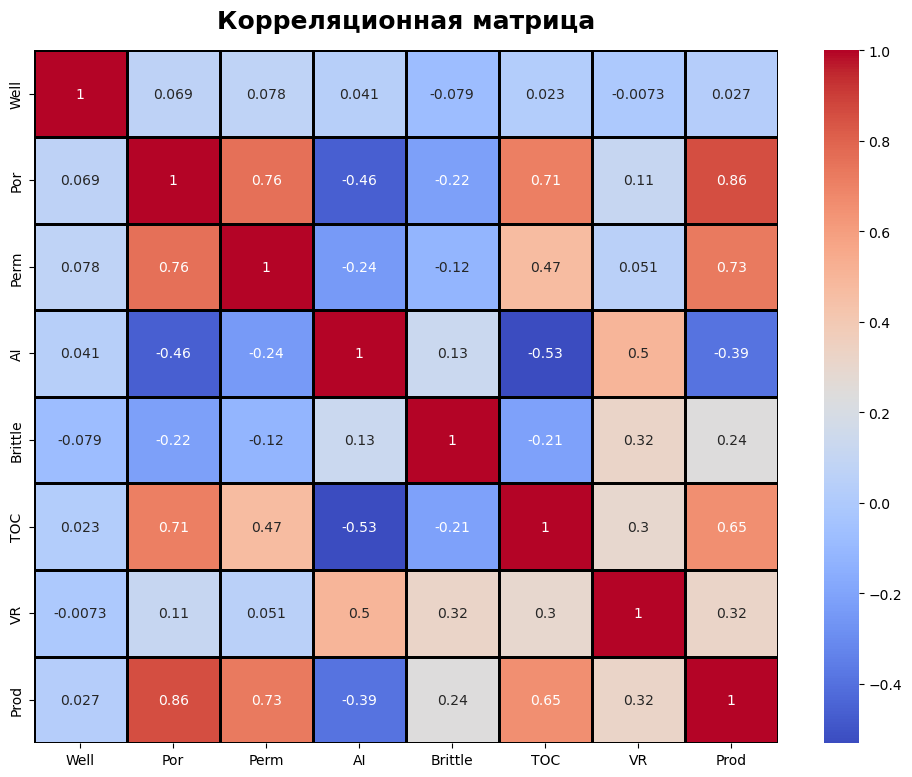

In [111]:
fig, ax = plt.subplots(figsize=(12, 9)) # создаем новую фигуру и оси для построения график
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=1, linecolor='black') # строим тепловую карту на основе корреляционной матрицы
plt.title('Корреляционная матрица', y=1.02, fontsize=18, fontweight='bold', fontname='DejaVu Sans') # добавляем заголовок к графику

# Сохраним график
plt.savefig('charts/correlation_matrix.png', dpi=300)

plt.show()

In [112]:
# Рассчитываем ранг корреляционной матрицы
rank_matrix = np.linalg.matrix_rank(correlation_matrix)
print('Ранг корреляционной матрицы:', rank_matrix)
print('Размер матриц:', data.shape) 

# Рассчитываем определитель корреляционной матрицы
determinant = np.linalg.det(correlation_matrix)
print('Определитель корреляционной матрицы:', determinant)

Ранг корреляционной матрицы: 8
Размер матриц: (200, 8)
Определитель корреляционной матрицы: 0.0007299388072652069


> *Ваши выводы здесь*

Вывод
---

**Корреляция между переменными:**
* Переменные Por и Perm имеют самую высокую корреляцию, что свидетельствует о их сильной взаимосвязи.
* Переменная Prod также демонстрирует высокую корреляцию с Por и Perm.
* Остальные переменные имеют более низкие значения корреляции, что указывает на их меньшую взаимосвязь с исследуемыми параметрами.

**Мультиколлинеарность:**
* Присутствие мультиколлинеарности между признаками Por, Perm и TOC подтверждается высокими значениями корреляции (выше 0.7). Это может привести к нестабильности коэффициентов модели линейной регрессии.

**Ранг матрицы:**
* Ранг корреляционной матрицы составляет 8, что означает, что все 8 переменных линейно независимы. Это подтверждает отсутствие линейной зависимости между переменными.

**Определитель матрицы:**
* Определитель корреляционной матрицы равен 0.00073, что указывает на наличие мультиколлинеарности между переменными. Малый определитель свидетельствует о том, что некоторые переменные могут быть сильно коррелированы, что может затруднить интерпретацию результатов и ухудшить качество модели.

**Обусловленность матрицы:**
* Корреляционная матрица является плохо обусловленной из-за малого определителя. Это может свидетельствовать о наличии мультиколлинеарности и нестабильности модели.


### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [113]:
# Ваш код здесь
######################################################
target_parameter = data["Prod"].values 
other_parameters = data.drop(['Well', 'Prod'], axis=1).values 

# Добавляем столбец единиц
other_parameters = np.hstack([np.ones((other_parameters.shape[0], 1)), other_parameters])

# Вычисление коэффициентов линейной регрессии по формуле МНК
beta = np.linalg.inv(other_parameters.T @ other_parameters) @ other_parameters.T @ target_parameter

# Округление коэффициентов до целых чисел
beta_rounded = np.round(beta)

# Создание словаря с названиями признаков и их коэффициентами
coefficients = {
    'Свободный член (константа)': beta_rounded[0],
    'Пористость (Por)': beta_rounded[1],
    'Проницаемость (Perm)': beta_rounded[2],
    'Индекс литологии (AI)': beta_rounded[3],
    'Индекс хрупкости (Brittle)': beta_rounded[4],
    'Общее содержание углерода (TOC)': beta_rounded[5],
    'Индекс витринизации (VR)': beta_rounded[6]
}

# Вывод результатов
print("Оценки коэффициентов модели (округленные до целых чисел):")
for feature, coef in coefficients.items():
    print(f"{feature}: {coef}")

Оценки коэффициентов модели (округленные до целых чисел):
Свободный член (константа): -1230.0
Пористость (Por): 230.0
Проницаемость (Perm): 116.0
Индекс литологии (AI): -364.0
Индекс хрупкости (Brittle): 25.0
Общее содержание углерода (TOC): -77.0
Индекс витринизации (VR): 783.0


> *Ваши выводы здесь*

Вывод
---


**Анализ информативности признаков**

1. Пористость (Por):
   * Значимый коэффициент 230 говорит о том, что увеличение пористости на единицу повышает выработку газа на 230 единиц.

1. Проницаемость (Perm):
   * Коэффициент 116 указывает на рост выработки газа на 116 единиц при увеличении проницаемости на единицу.

1. Индекс литологии (AI):
   * Отрицательный коэффициент -364 свидетельствует о снижении выработки газа на 364 единицы при увеличении индекса литологии на единицу.

1. Индекс хрупкости (Brittle):
   * Положительный коэффициент 25 означает рост выработки газа на 25 единиц при увеличении индекса хрупкости.

1. Общее содержание углерода (TOC):
   * Отрицательный коэффициент -77 указывает на снижение выработки газа на 77 единиц при увеличении TOC.

1. Индекс витринизации (VR):
   * Высокий коэффициент 783 показывает значительный рост выработки газа на 783 единицы при увеличении VR.

**Интерпретация коэффициентов**

Свободный член (константа) -1230 влияет на выработку газа, но его интерпретация требует дополнительного анализа.



### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [139]:
# Ваш код здесь
######################################################
X = other_parameters.copy()
y = target_parameter.copy()
# Данные для прогноза
data_for_prediction = {
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
}

# Подготовка данных для прогноза
X_test = np.array([[1, *data_for_prediction.values()]]).transpose()
# Удаляем столбец Well из данных
X_test = np.delete(X_test, 1)

# Прогноз
pred_single = X_test @ beta
actual_value = 4748.315024

# Расчет абсолютной ошибки
abs_error = abs(actual_value - pred_single)

print(f"Прогноз для тестовой скважины: {pred_single:.2f}")
print(f"Фактическое значение: {actual_value}")
print(f"Абсолютная ошибка прогноза: {abs_error:.2f}")

# Прогноз для всех скважин обучающего набора
y_pred = X @ beta

# Расчет метрик качества
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("\n-----------------------------------------------------------------------------------------\n")
print("Метрики качества модели:")
print(f"Средняя абсолютная ошибка (MAE): {mae:.4f}")
print(f"Средняя квадратичная ошибка (MSE): {mse:.4f}")
print(f"Коэффициент детерминации (R²): {r2:.4f}")


Прогноз для тестовой скважины: 4722.72
Фактическое значение: 4748.315024
Абсолютная ошибка прогноза: 25.59

-----------------------------------------------------------------------------------------

Метрики качества модели:
Средняя абсолютная ошибка (MAE): 153.6037
Средняя квадратичная ошибка (MSE): 39323.4058
Коэффициент детерминации (R²): 0.9598


> *Ваши выводы здесь*

Выод
---

**Метрики качества модели:**

Средняя абсолютная ошибка (MAE):
* Значение: 153.6037
* Интерпретация: Средняя абсолютная ошибка показывает, что в среднем абсолютное отклонение предсказанных значений от фактических составляет 153.6037 единиц, то есть прогнозы отклоняются от фактических значений в обе стороны (как в большую, так и в меньшую).

Средняя квадратичная ошибка (MSE):
* Значение: 39323.4058
* Интерпретация: Средняя квадратичная ошибка указывает на наличие значительных отклонений в предсказаниях. Это значение можно использовать для сравнения с другими моделями и оценки влияния выбросов.

Коэффициент детерминации (R²):
* Значение: 0.9598
* Интерпретация: Коэффициент детерминации R² составляет 0.9598, что указывает на высокую степень соответствия между фактическими и предсказанными значениями. Это означает, что модель объясняет 95.98% вариации в данных, что свидетельствует о хорошей предсказательной способности модели.

**Заключение:**

На основе полученных метрик можно сделать вывод о высоком качестве разработанной модели прогнозирования. Средняя абсолютная ошибка и средняя квадратичная ошибка указывают на отсутствие значительных отклонений в предсказаниях, а коэффициент детерминации R² подтверждает высокую точность модели.

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [129]:
# Ваш код здесь
######################################################

print("Коэффициенты корреляции:\n", correlation_matrix.loc["Prod"].to_frame())
print("\n-----------------------------------------------------------------------------------------\n")
print("Коэффициенты:\n", beta_rounded)

Коэффициенты корреляции:
              Prod
Well     0.026817
Por      0.861910
Perm     0.727426
AI      -0.390835
Brittle  0.237155
TOC      0.654445
VR       0.323182
Prod     1.000000

-----------------------------------------------------------------------------------------

Коэффициенты:
 [-1230.   230.   116.  -364.    25.   -77.   783.]


> *Ваши выводы здесь*

Вывод
---

**Ключевые наблюдения:**

1. TOC: корреляция 0.654445, коэффициент регрессии -77
2. VR: корреляция 0.323182, коэффициент регрессии 783
3. Well: корреляция 0.026817, коэффициент регрессии 230
4. Perm: корреляция 0.727426, коэффициент регрессии -364

**Анализ несоответствий:**

1. Мультиколлинеарность: вероятная причина противоречий, особенно для TOC и Perm.
2. Выбросы: могут существенно влиять на коэффициенты регрессии.



### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [149]:
# Ваш код здесь
######################################################
# Посмотрим на нашу матрицу 
correlation_matrix

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
Well,1.000000,0.068927,0.077928,0.041483,-0.079252,0.022624,-0.007279,0.026817
Por,0.068927,1.000000,0.760546,-0.461549,-0.218570,0.711831,0.111860,0.861910
Perm,0.077928,0.760546,1.000000,-0.239636,-0.124017,0.471746,0.051023,0.727426
AI,0.041483,-0.461549,-0.239636,1.000000,0.127599,-0.531864,0.499143,-0.390835
Brittle,-0.079252,-0.218570,-0.124017,0.127599,1.000000,-0.214282,0.317929,0.237155
TOC,0.022624,0.711831,0.471746,-0.531864,-0.214282,1.000000,0.299483,0.654445
VR,-0.007279,0.111860,0.051023,0.499143,0.317929,0.299483,1.000000,0.323182
Prod,0.026817,0.861910,0.727426,-0.390835,0.237155,0.654445,0.323182,1.000000


In [124]:
# Теперь надо нати признаки с кореляцией больше 0.7, чтоб исключить их 
correlation_matrix_07 = correlation_matrix.loc['Prod'].to_frame()
correlation_matrix_07 = correlation_matrix_07[correlation_matrix_07['Prod'] > 0.7]
correlation_matrix_07 = correlation_matrix_07[correlation_matrix_07['Prod'] < 1]
correlation_matrix_07


,Prod
Por,0.861910
Perm,0.727426


In [125]:
# Получаем список признаков для исключения
list_07 = correlation_matrix_07.index.tolist()

print("Признаки для исключения:", list_07)

Признаки для исключения: ['Por', 'Perm']


In [126]:
# Теперь надо нати признаки с кореляцией меньше 0.05, чтоб исключить их 
correlation_matrix_005 = correlation_matrix.loc['Prod'].to_frame()
correlation_matrix_005 = correlation_matrix_005[correlation_matrix_005['Prod'] < 0.05]
correlation_matrix_005


,Prod
Well,0.026817
AI,-0.390835


In [127]:
# Получаем список признаков для исключения
list_005 = correlation_matrix_005.index.tolist()

print("Признаки для исключения:", list_005)

Признаки для исключения: ['Well', 'AI']


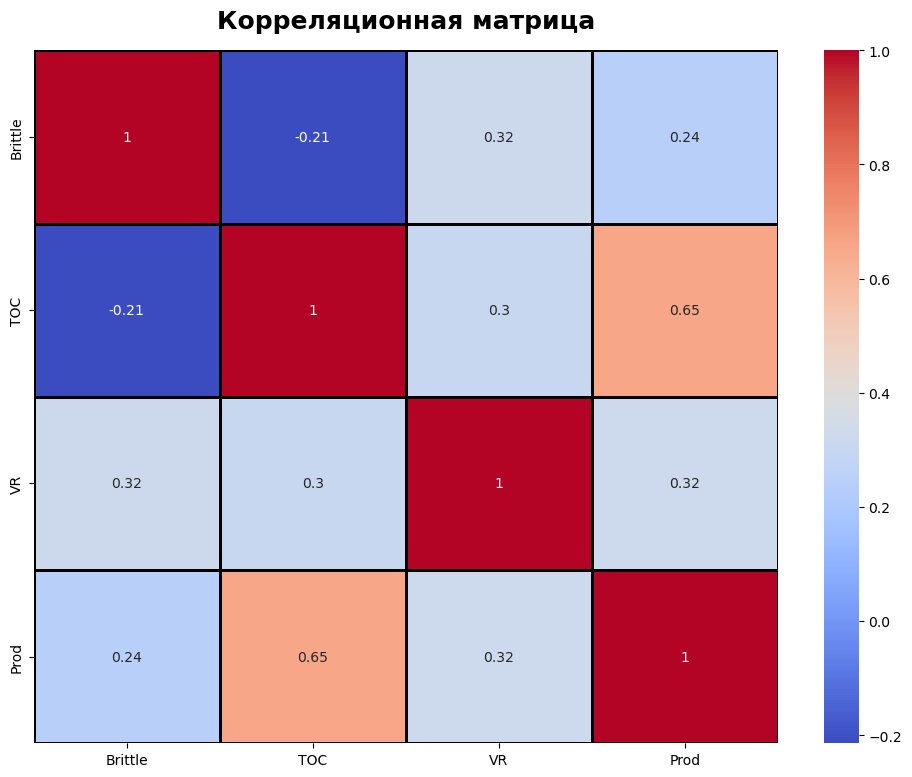

In [128]:
# Готовим данные
x = data.copy()
y = data['Prod']
# Удаляем столбецы из данных с сильной и с слабой корреляцией
features_to_remove = list(set(list_005) | set(list_07)) 
x.drop(features_to_remove, axis=1, inplace=True)

# Построение тепловой карты
fig, ax = plt.subplots(figsize=(12, 9)) # создаем новую фигуру и оси для построения график
sns.heatmap(x.corr(), annot=True, cmap='coolwarm', linewidths=1, linecolor='black') # строим тепловую карту 
plt.title('Корреляционная матрица', y=1.02, fontsize=18, fontweight='bold', fontname='DejaVu Sans') # добавляем заголовок к графику

# Сохраним график
plt.savefig('charts/correlation_matrix_wo_07_and_005.png', dpi=300)

# Показываем график
plt.show()

In [130]:
x.drop(['Prod'], axis=1, inplace=True)
print(f'Ранг матрицы: ', np.linalg.matrix_rank(x.corr()))
print(f'Определитель матрицы: ', np.linalg.det(x.corr()))

Ранг матрицы:  3
Определитель матрицы:  0.7225093762088152


In [131]:
x = np.column_stack((np.ones(200), x.values))
w_hat = np.round(np.linalg.inv(x.T@x)@x.T@y, 0)
print('w_hat: ', w_hat)

w_hat:  [1603.   29. 1548. -104.]


In [144]:
x = pd.DataFrame(x)
d = pd.DataFrame()
d['prod'] = x.apply(lambda z: (z@w_hat), axis=1)
y = pd.DataFrame(y)

# Расчет метрик качества
mae_model_2 = mean_absolute_error(y, d['prod'])
mse_model_2 = mean_squared_error(y, d['prod'])
r2_model_2 = r2_score(y, d['prod'])

print("Метрики качества прошлой модели:")
print(f"Средняя абсолютная ошибка (MAE): {mae:.4f}")
print(f"Средняя квадратичная ошибка (MSE): {mse:.4f}")
print(f"Коэффициент детерминации (R²): {r2:.4f}")
print("\n-----------------------------------------------------------------------------------------\n")
print("Метрики качества новой модели:")
print(f"Средняя абсолютная ошибка (MAE): {mae_model_2:.4f}")
print(f"Средняя квадратичная ошибка (MSE): {mse_model_2:.4f}")
print(f"Коэффициент детерминации (R²): {r2_model_2:.4f}")
print("\n-----------------------------------------------------------------------------------------\n")
# Сравнение
metrics_model1 = {'MAE': mae, 'MSE': mse, 'R2': r2}
metrics_model2 = {'MAE': mae_model_2, 'MSE': mse_model_2, 'R2': r2_model_2}
print('Сравнение:')
for metric in metrics_model1.keys():
    abs_diff = metrics_model2[metric] - metrics_model1[metric]
    rel_diff = (abs_diff / metrics_model1[metric]) * 100

    print(f"  {metric}:")
    print(f"    Абсолютная разница: {abs_diff:.4f}")
    print(f"    Относительное изменение: {rel_diff:.2f}%")

Метрики качества прошлой модели:
Средняя абсолютная ошибка (MAE): 153.6037
Средняя квадратичная ошибка (MSE): 39323.4058
Коэффициент детерминации (R²): 0.9598

-----------------------------------------------------------------------------------------

Метрики качества новой модели:
Средняя абсолютная ошибка (MAE): 522.2782
Средняя квадратичная ошибка (MSE): 413228.7885
Коэффициент детерминации (R²): 0.5780

-----------------------------------------------------------------------------------------

Сравнение:
  MAE:
    Абсолютная разница: 368.6745
    Относительное изменение: 240.02%
  MSE:
    Абсолютная разница: 373905.3827
    Относительное изменение: 950.85%
  R2:
    Абсолютная разница: -0.3818
    Относительное изменение: -39.78%


> *Ваши выводы здесь*

Вывод
---

**Исключенные признаки**

На основании анализа коэффициентов корреляции были исключены следующие признаки:

- **Сильно коррелированные факторы (коэффициент > 0.7)**:
  - `Por`
  - `Perm`

- **Факторы с низкой корреляцией (коэффициент < 0.05)**:
  - `Well`
  - `AI`

**Интерпретация метрик качества новой модели**

Метрики новой модели показывают значительное ухудшение по сравнению с предыдущими результатами:

- **MAE** увеличилась до 522.2782, что означает, что в среднем предсказания отклоняются от фактических значений на более чем в три раза больше, чем в предыдущей модели.
  
- **MSE** возросла до 413228.7885, указывая на наличие больших ошибок в предсказаниях и возможное влияние выбросов.

- **Коэффициент детерминации (R²)** снизился до 0.5780, что говорит о том, что модель объясняет лишь около 57.8% вариации в данных, по сравнению с более чем 95% в предыдущей модели.


### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [153]:
# Ваш код здесь
######################################################

# Подготовка данных
X_sklearn = data.copy()
y = data['Prod']
# Удаляем столбецы из данных с сильной корреляцией
X_sklearn.drop(features_to_remove, axis=1, inplace=True)
# Удаляем прогнозируемые признаки
X_sklearn.drop(['Prod'], axis=1, inplace=True)

# Создание и обучение модели
model = LinearRegression()
model.fit(X_sklearn, y)

# Получение коэффициентов
sklearn_coef = np.round(model.coef_)
sklearn_intercept = np.round(model.intercept_)

# Вывод коэффициентов
print("Коэффициенты модели sklearn:")
print(f"Константа: {sklearn_intercept}")
for feat, coef in zip(X_sklearn.columns, sklearn_coef):
    print(f"{feat}: {coef}")

# Прогнозирование
y_pred_sklearn = model.predict(X_sklearn)
# Расчет метрик качества
mae_model_sklearn = mean_absolute_error(y, y_pred_sklearn)
mse_model_sklearn = mean_squared_error(y, y_pred_sklearn)
r2_model_sklearn = r2_score(y, y_pred_sklearn)

print("Метрики качества модели sklearn:")
print(f"Средняя абсолютная ошибка (MAE): {mae_model_sklearn:.4f}")
print(f"Средняя квадратичная ошибка (MSE): {mse_model_sklearn:.4f}")
print(f"Коэффициент детерминации (R²): {r2_model_sklearn:.4f}")
print("\n-----------------------------------------------------------------------------------------\n")
print("Метрики качества прошлой модели:")
print(f"Средняя абсолютная ошибка (MAE): {mae_model_2:.4f}")
print(f"Средняя квадратичная ошибка (MSE): {mse_model_2:.4f}")
print(f"Коэффициент детерминации (R²): {r2_model_2:.4f}")
print("\n-----------------------------------------------------------------------------------------\n")
# Сравнение
metrics_model3 = {'MAE': mae_model_sklearn, 'MSE': mse_model_sklearn, 'R2': r2_model_sklearn}
print('Сравнение:')
for metric in metrics_model2.keys():
    abs_diff = metrics_model3[metric] - metrics_model2[metric]
    rel_diff = (abs_diff / metrics_model2[metric]) * 100

    print(f"  {metric}:")
    print(f"    Абсолютная разница: {abs_diff:.4f}")
    print(f"    Относительное изменение: {rel_diff:.2f}%")

Коэффициенты модели sklearn:
Константа: 1603.0
Brittle: 29.0
TOC: 1548.0
VR: -104.0
Метрики качества модели sklearn:
Средняя абсолютная ошибка (MAE): 518.3356
Средняя квадратичная ошибка (MSE): 412902.9310
Коэффициент детерминации (R²): 0.5783

-----------------------------------------------------------------------------------------

Метрики качества прошлой модели:
Средняя абсолютная ошибка (MAE): 522.2782
Средняя квадратичная ошибка (MSE): 413228.7885
Коэффициент детерминации (R²): 0.5780

-----------------------------------------------------------------------------------------

Сравнение:
  MAE:
    Абсолютная разница: -3.9425
    Относительное изменение: -0.75%
  MSE:
    Абсолютная разница: -325.8575
    Относительное изменение: -0.08%
  R2:
    Абсолютная разница: 0.0003
    Относительное изменение: 0.06%


> *Ваши выводы здесь*

Вывод
---

* **Сходство результатов:** Обе модели показывают очень близкие результаты, что говорит о корректности реализации ручной модели.

* **Небольшое преимущество sklearn:** Модель sklearn демонстрирует незначительное улучшение по всем метрикам. Это может быть связано с более оптимизированными алгоритмами или небольшими различиями в реализации.

* **Упрощения кода:** Проще пользоваться sklearn так как писать кода нужно значительно мньше

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [154]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [157]:
# Ваш код здесь
####################################################

x_clean = data.copy()
x_clean.drop(['Prod', 'Perm', 'TOC', 'Well'], axis=1, inplace=True)
x_clean

,Por,AI,Brittle,VR
0,12.08,2.80,81.40,2.31
1,12.38,3.22,46.17,1.88
2,14.02,4.01,72.80,2.72
3,17.67,2.63,39.81,1.88
4,17.52,3.18,10.94,1.90
...,...,...,...,...
195,11.95,2.97,67.18,2.06
196,17.99,3.38,44.32,2.08
197,12.12,3.52,57.07,1.73
198,15.55,2.48,58.25,2.35


In [158]:
x = x_clean.copy()
y = data['Prod']

scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

poly = PolynomialFeatures(degree=3, include_bias=False)
x_poly = poly.fit_transform(x_scale)
pd.DataFrame(x_poly).shape

(200, 34)

In [159]:
lr = LinearRegression()

# MAE
cv_results_lr_mae = cross_validate(lr, x_poly, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
print('MAE на тренировочных фолдах: {:.2f} ед.'.format(-cv_results_lr_mae['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f} ед.'.format(-cv_results_lr_mae['test_score'].mean()))                      
print("\n-----------------------------------------------------------------------------------------\n")                                                                                                                                         
# MSE              
cv_results_lr_mse = cross_validate(lr, x_poly, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
print('MSE на тренировочных фолдах: {:.2f} ед.^2'.format(-cv_results_lr_mse['train_score'].mean()))
print('MSE на валидационных фолдах: {:.2f} ед.^2'.format(-cv_results_lr_mse['test_score'].mean()))
print("\n-----------------------------------------------------------------------------------------\n")
# R2
cv_results_lr_r2 = cross_validate(lr, x_poly, y, scoring='r2', cv=5, return_train_score=True)
print('R² на тренировочных фолдах: {:.4f}'.format(cv_results_lr_r2['train_score'].mean()))
print('R² на валидационных фолдах: {:.4f}'.format(cv_results_lr_r2['test_score'].mean()))

MAE на тренировочных фолдах: 75.35 ед.
MAE на валидационных фолдах: 110.47 ед.

-----------------------------------------------------------------------------------------

MSE на тренировочных фолдах: 10162.07 ед.^2
MSE на валидационных фолдах: 24335.09 ед.^2

-----------------------------------------------------------------------------------------

R² на тренировочных фолдах: 0.9896
R² на валидационных фолдах: 0.9748


> *Ваши выводы здесь*

Выод
---
**Интерпретация:**

1. **Высокое качество модели:** Высокие значения R² как на тренировочных, так и на валидационных данных указывают на то, что модель хорошо объясняет зависимость между признаками и целевой переменной.

2. **Переобученость модели:** Разница между метриками на тренировочных и валидационных фолдах (особенно по MSE) говорит о том, что модель немного переобучена:
* MAE увеличивается примерно на 46% (с 75.35 до 110.47).
* MSE увеличивается примерно на 139% (с 10,162 до 24,335).

    Это означает, что модель может быть слишком сильно подстроена под обучающие данные и теряет точность при работе с новыми данными.


### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [160]:
# Ваш код здесь
######################################################

part1 = np.arange(0.1, 1, 0.1)

part2 = np.arange(1, 101, 1)

params_to_check = np.concatenate((part1, part2))

params_to_check


array([  0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,   0.9,
         1. ,   2. ,   3. ,   4. ,   5. ,   6. ,   7. ,   8. ,   9. ,
        10. ,  11. ,  12. ,  13. ,  14. ,  15. ,  16. ,  17. ,  18. ,
        19. ,  20. ,  21. ,  22. ,  23. ,  24. ,  25. ,  26. ,  27. ,
        28. ,  29. ,  30. ,  31. ,  32. ,  33. ,  34. ,  35. ,  36. ,
        37. ,  38. ,  39. ,  40. ,  41. ,  42. ,  43. ,  44. ,  45. ,
        46. ,  47. ,  48. ,  49. ,  50. ,  51. ,  52. ,  53. ,  54. ,
        55. ,  56. ,  57. ,  58. ,  59. ,  60. ,  61. ,  62. ,  63. ,
        64. ,  65. ,  66. ,  67. ,  68. ,  69. ,  70. ,  71. ,  72. ,
        73. ,  74. ,  75. ,  76. ,  77. ,  78. ,  79. ,  80. ,  81. ,
        82. ,  83. ,  84. ,  85. ,  86. ,  87. ,  88. ,  89. ,  90. ,
        91. ,  92. ,  93. ,  94. ,  95. ,  96. ,  97. ,  98. ,  99. ,
       100. ])

In [170]:
grid_search_lasso = GridSearchCV(
    estimator=Lasso(),
    param_grid={
        'alpha': params_to_check
    },
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
)
grid_search_lasso.fit(x_poly, y)

print("Лучшие гиперпараметры:", grid_search_lasso.best_params_)
print("Лучшая метрика (MAE):", -grid_search_lasso.best_score_)
print('\n')

lasso = Lasso(alpha=grid_search_lasso.best_params_['alpha'], max_iter=500000, selection='random')

cv_results_lasso_mae = cross_validate(lasso, x_poly, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
cv_results_lasso_mse = cross_validate(lasso, x_poly, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)

print('MAE на тренировочных фолдах: {:.2f} ед.'.format(-cv_results_lasso_mae['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f} ед.'.format(-cv_results_lasso_mae['test_score'].mean()))
print('\n')
print('MSE на тренировочных фолдах: {:.2f} ед.^2'.format(-cv_results_lasso_mse['train_score'].mean()))
print('MSE на валидационных фолдах: {:.2f} ед.^2'.format(-cv_results_lasso_mse['test_score'].mean()))

Лучшие гиперпараметры: {'alpha': 5.0}
Лучшая метрика (MAE): 95.69490293534994


MAE на тренировочных фолдах: 78.29 ед.
MAE на валидационных фолдах: 95.66 ед.


MSE на тренировочных фолдах: 11422.98 ед.^2
MSE на валидационных фолдах: 17250.31 ед.^2


/home/gna/.conda/envs/ml/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.955e+04, tolerance: 1.612e+04
  model = cd_fast.enet_coordinate_descent(
/home/gna/.conda/envs/ml/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.115e+04, tolerance: 1.617e+04
  model = cd_fast.enet_coordinate_descent(
/home/gna/.conda/envs/ml/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

> *Ваши выводы здесь*

Выод
---

Анализ значений средней абсолютной ошибки (MAE) на тренировочных (78.30) и валидационных (95.69) данных указывает на наличие переобучения модели. Это подтверждается тем, что модель демонстрирует высокую точность на тренировочных данных, однако её обобщающая способность на валидационных данных оказывается значительно ниже. Данный вывод свидетельствует о том, что модель излишне подстраивается под обучающую выборку, что может привести к снижению её эффективности при применении на новых, реальных данных.

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [171]:
# Ваш код здесь
######################################################

grid_search_ridge = GridSearchCV(
    estimator=Ridge(),
    param_grid={
        'alpha': params_to_check
    },
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
)
grid_search_ridge.fit(x_poly, y)

print("Лучшие гиперпараметры:", grid_search_ridge.best_params_)
print("Лучшая метрика (MAE):", -grid_search_ridge.best_score_)
print('\n')

ridge = Ridge(alpha=grid_search_ridge.best_params_['alpha'])

cv_results_ridge_mae = cross_validate(ridge, x_poly, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
cv_results_ridge_mse = cross_validate(ridge, x_poly, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)

print('MAE на тренировочных фолдах: {:.2f} ед.'.format(-cv_results_ridge_mae['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f} ед.'.format(-cv_results_ridge_mae['test_score'].mean()))
print('\n')
print('MSE на тренировочных фолдах: {:.2f} ед.^2'.format(-cv_results_ridge_mse['train_score'].mean()))
print('MSE на валидационных фолдах: {:.2f} ед.^2'.format(-cv_results_ridge_mse['test_score'].mean()))

Лучшие гиперпараметры: {'alpha': 0.2}
Лучшая метрика (MAE): 110.06942279040743


MAE на тренировочных фолдах: 75.40 ед.
MAE на валидационных фолдах: 110.07 ед.


MSE на тренировочных фолдах: 10184.29 ед.^2
MSE на валидационных фолдах: 24013.16 ед.^2


> *Ваши выводы здесь*

Вывод
---

Анализ значений средней абсолютной ошибки (MAE) в размере 75.40 на тренировочных и 110.07 на валидационных данных свидетельствует о том, что модель демонстрирует высокую точность на обучающей выборке, однако её способность к обобщению на новых, ранее не встречавшихся данных является недостаточной. Это указывает на возможное явление переобучения, при котором модель слишком точно подстраивается под обучающий набор данных, теряя при этом способность к эффективному прогнозированию на новых данных.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [172]:
# Ваш код здесь
######################################################

grid_search_elasticnet = GridSearchCV(
    estimator=ElasticNet(max_iter=10000),
    param_grid={
        'alpha': params_to_check,
        'l1_ratio': part1
    },
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
)
grid_search_elasticnet.fit(x_poly, y)

print("Лучшие гиперпараметры:", grid_search_elasticnet.best_params_)
print("Лучшая метрика (MAE):", -grid_search_elasticnet.best_score_)
print('\n')

elasticnet = ElasticNet(
    alpha=grid_search_elasticnet.best_params_['alpha'],
    l1_ratio=grid_search_elasticnet.best_params_['l1_ratio'],
    max_iter=10000
)

cv_results_elasticnet_mae = cross_validate(elasticnet, 
                                           x_poly, 
                                           y, 
                                           scoring='neg_mean_absolute_error', 
                                           cv=5, 
                                           return_train_score=True)
cv_results_elasticnet_mse = cross_validate(elasticnet, 
                                           x_poly, 
                                           y, 
                                           scoring='neg_mean_squared_error', 
                                           cv=5, 
                                           return_train_score=True)

print('MAE на тренировочных фолдах: {:.2f} ед.'.format(-cv_results_elasticnet_mae['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f} ед.'.format(-cv_results_elasticnet_mae['test_score'].mean()))
print('\n')
print('MSE на тренировочных фолдах: {:.2f} ед.^2'.format(-cv_results_elasticnet_mse['train_score'].mean()))
print('MSE на валидационных фолдах: {:.2f} ед.^2'.format(-cv_results_elasticnet_mse['test_score'].mean()))

Лучшие гиперпараметры: {'alpha': 0.1, 'l1_ratio': 0.9}
Лучшая метрика (MAE): 112.97994157329185


MAE на тренировочных фолдах: 79.15 ед.
MAE на валидационных фолдах: 112.98 ед.


MSE на тренировочных фолдах: 10947.25 ед.^2
MSE на валидационных фолдах: 24101.01 ед.^2


> *Ваши выводы здесь*

Выод
---

Значения MAE (79.15 на тренировочных данных и 112.98 на валидационных) показывают, что модель хорошо подстраивается под тренировочные данные, но хуже обобщается на валидационных, что указывает на возможное переобучение.

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [173]:
# Ваш код здесь
############################################################

res = [[
    'LinearRegression',
    np.NaN,
    np.bool_(False),
    format(-cv_results_lr_mae['train_score'].mean(), '.2f'),
    format(-cv_results_lr_mae['test_score'].mean(), '.2f'),
    format(-cv_results_lr_mse['train_score'].mean(), '.2f'),
    format(-cv_results_lr_mse['test_score'].mean(), '.2f'),
], [
    'Lasso',
    grid_search_lasso.best_params_,
    np.bool_(True),
    format(-cv_results_lasso_mae['train_score'].mean(), '.2f'),
    format(-cv_results_lasso_mae['test_score'].mean(), '.2f'),
    format(-cv_results_lasso_mse['train_score'].mean(), '.2f'),
    format(-cv_results_lasso_mse['test_score'].mean(), '.2f'),
], [
    'Ridge',
    grid_search_ridge.best_params_,
    np.bool_(True),
    format(-cv_results_ridge_mae['train_score'].mean(), '.2f'),
    format(-cv_results_ridge_mae['test_score'].mean(), '.2f'),
    format(-cv_results_ridge_mse['train_score'].mean(), '.2f'),
    format(-cv_results_ridge_mse['test_score'].mean(), '.2f'),
], [
    'ElasticNet',
    grid_search_elasticnet.best_params_,
    np.bool_(True),
    format(-cv_results_elasticnet_mae['train_score'].mean(), '.2f'),
    format(-cv_results_elasticnet_mae['test_score'].mean(), '.2f'),
    format(-cv_results_elasticnet_mse['train_score'].mean(), '.2f'),
    format(-cv_results_elasticnet_mse['test_score'].mean(), '.2f'),
]]

results_df = pd.DataFrame(
    res, 
    columns=[
        'model_name', 
        'hyperparameters', 
        'is_use_poly_features',
        'cv_train_score_mae',
        'cv_test_score_mae',
        'cv_train_score_mse',
        'cv_test_score_mse',
    ]
)

In [174]:
results_df.head()

,model_name,hyperparameters,is_use_poly_features,cv_train_score_mae,cv_test_score_mae,cv_train_score_mse,cv_test_score_mse
0,LinearRegression,NaN,False,75.35,110.47,10162.07,24335.09
1,Lasso,{'alpha': 5.0},True,78.29,95.66,11422.98,17250.31
2,Ridge,{'alpha': 0.2},True,75.40,110.07,10184.29,24013.16
3,ElasticNet,"{'alpha': 0.1, 'l1_ratio': 0.9}",True,79.15,112.98,10947.25,24101.01


> *Ваши выводы здесь*

Вывод
---

В результате исследования модель Lasso продемонстрировала наилучшие показатели на валидационных наборах данных. Она также показала минимальную чувствительность к выбросам, что делает её предпочтительным выбором для задач с большими отклонениями в данных.